Looking at all the STIS (and eventually all of the UV?) data

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample
import stistools
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting
from astropy.time import Time
from datetime import date


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [6]:
path = '/media/david/5tb_storage1/muscles/stis_x1ds/'
allspecs = np.hstack((glob.glob(path+'*x1d.fits'), glob.glob(path+'*sx1.fits')))
#allspecs



In [13]:
stars = []
gratings = []
for x in allspecs:
    hdr = fits.getheader(x)
    star = hdr['TARGNAME']
    if star != 'LP-756-18':
        stars.append(star)
        gratings.append(hdr['OPT_ELEM'])
    
stars = np.unique(stars)
gratings = np.unique(gratings)
print(stars)
print(gratings)

['2MASS-J23062928-0502285' 'GJ1132' 'GJ15A' 'GJ163' 'GJ649' 'GJ674'
 'GJ676A' 'GJ699' 'GJ729' 'GJ849' 'L-980-5' 'LHS-2686']
['E140M' 'G140L' 'G140M' 'G230L' 'G430L']


2MASS-J23062928-0502285


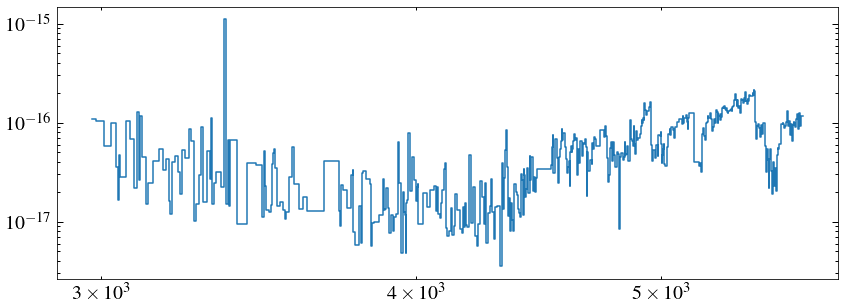

GJ1132


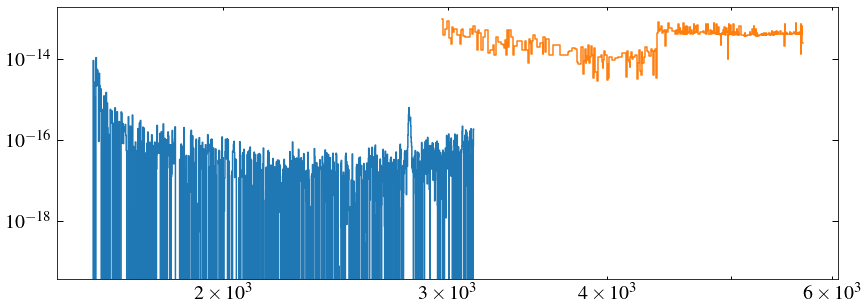

GJ15A


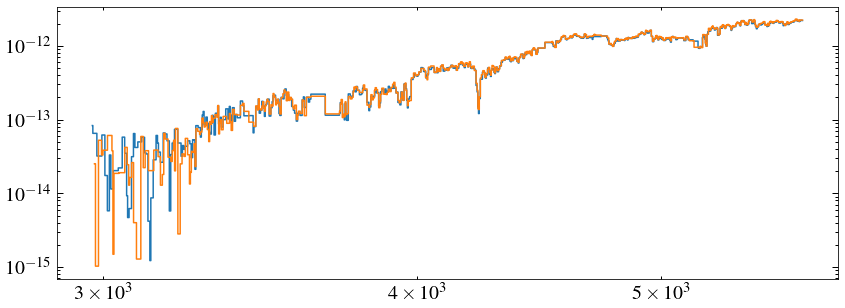

GJ163


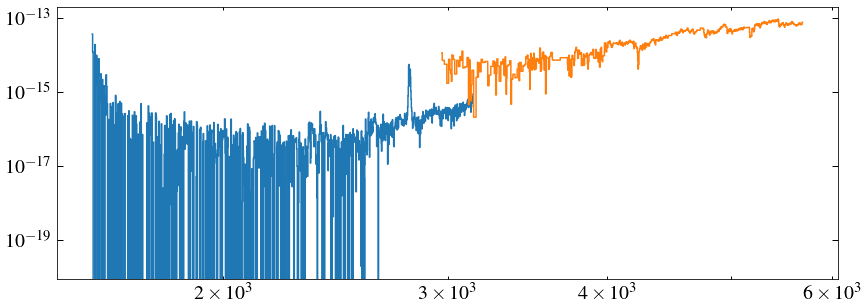

GJ649


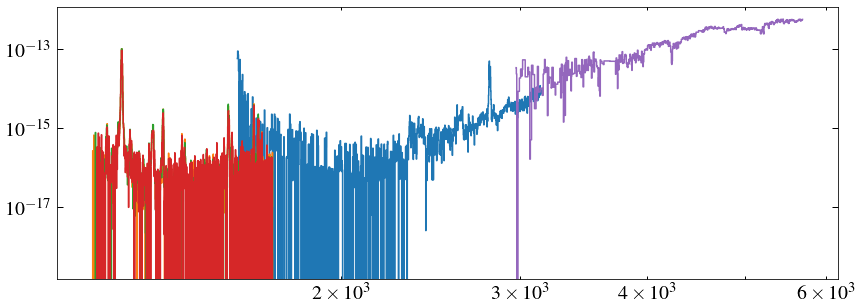

GJ674


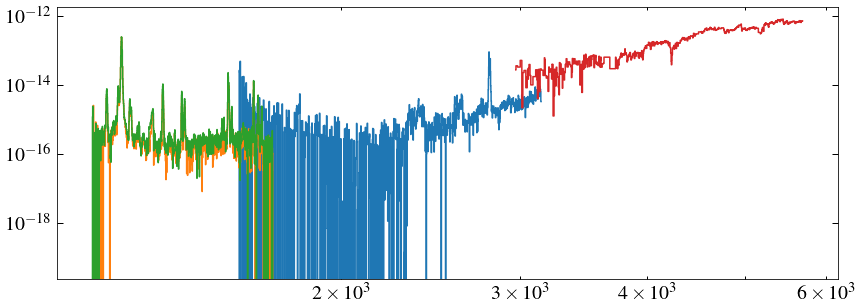

GJ676A


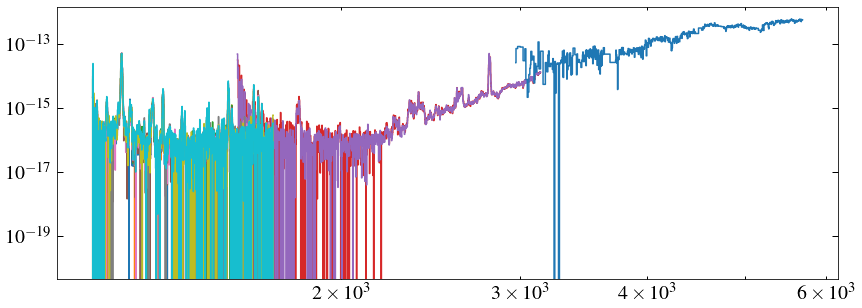

GJ699


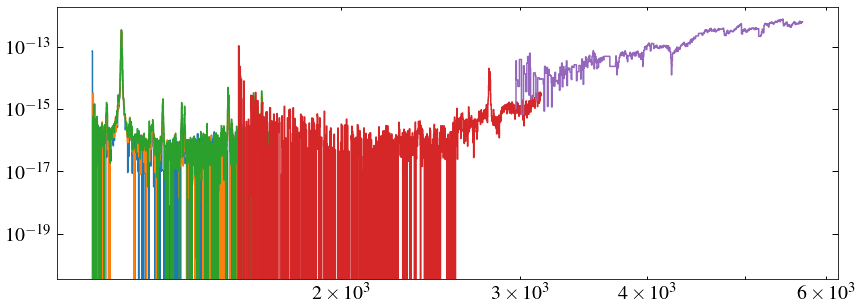

GJ729


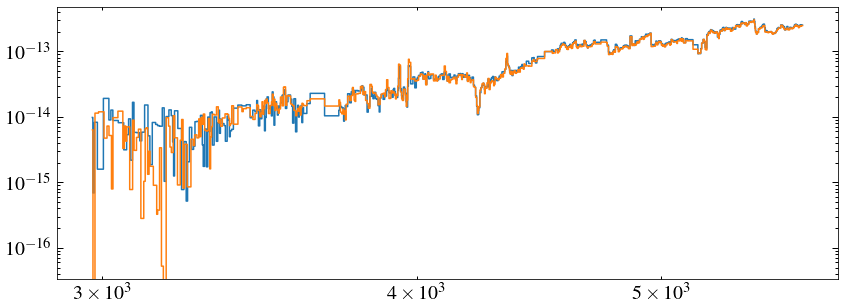

GJ849


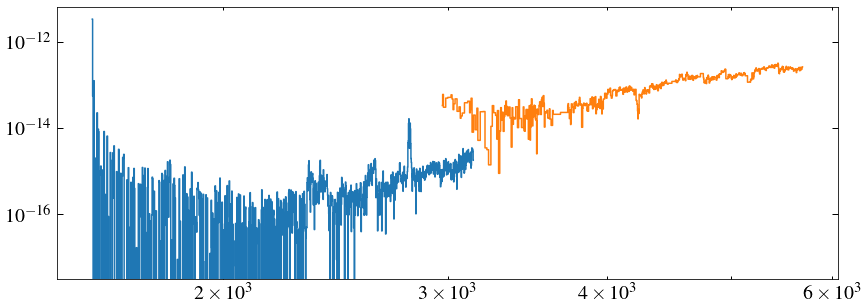

L-980-5


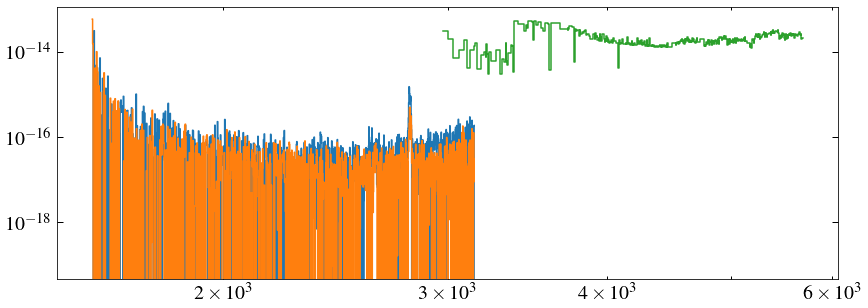

LHS-2686


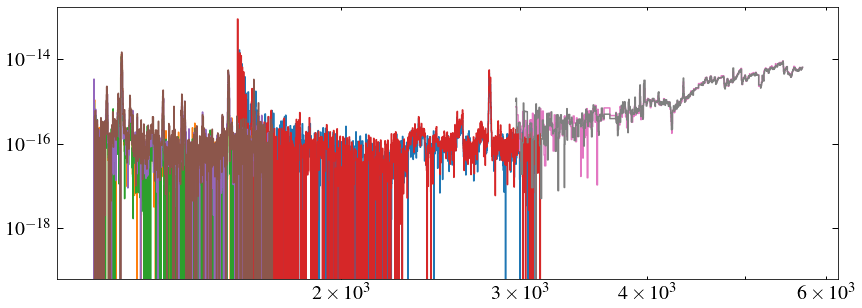

In [23]:
for star in stars:
    print(star)
    for x in allspecs:
        hdr = fits.getheader(x)
        if hdr['TARGNAME'] == star:
            if hdr['OPT_ELEM'] not in ['G140M', 'E140M']:
                data = fits.getdata(x, 1)[0]
                w, f , e , dq = data['WAVELENGTH'],data['FLUX'], data['ERROR'],data['DQ']
                w, f, e = w[dq ==0], f[dq ==0], e[dq ==0]
                plt.step(w, f, where='mid')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

In [24]:
import prepare_stis

In [34]:
prepare_stis.make_stis_spectum(path, 1, savepath = 'stis_test_output/', plot=False, save_ecsv=True, save_fits=False)

/home/david/work/muscles/SEDs/common/prepare_stis.py:29: RuntimeWarning: divide by zero encountered in true_divide
  weights = 1 / (e_array**2)
/home/david/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:422: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


Spectrum saved as hlsp_muscles_hst_stis_gj15a_e140m_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj674_g140l_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_lhs-2686_g140m_v1_component-spec.ecsv


/home/david/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:422: RuntimeWarning: invalid value encountered in true_divide
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


Spectrum saved as hlsp_muscles_hst_stis_lhs-2686_g230l_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_2mass-j23062928-0502285_g430l_v1_component-spec.ecsv


In [35]:
os.listdir('stis_test_output')

['hlsp_muscles_hst_stis_2mass-j23062928-0502285_g430l_v1_component-spec.ecsv',
 'hlsp_muscles_hst_stis_lhs-2686_g230l_v1_component-spec.ecsv',
 'hlsp_muscles_hst_stis_gj15a_e140m_v1_component-spec.ecsv',
 'hlsp_muscles_hst_stis_gj674_g140l_v1_component-spec.ecsv',
 'hlsp_muscles_hst_stis_lhs-2686_g140m_v1_component-spec.ecsv']